<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/statics/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 함수 정의

In [3]:
def random_graph_gen(xn=8, yn=8):
    data = {'size': random.sample(range(3, 11), xn),
            'price':random.sample(range(100, 200), yn)}

    df = pd.DataFrame(data)

    plt.scatter(df['size'], df['price'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    return df

def two_equation_gen(df):
    w_values = np.linspace(-50, 100, 151)
    result_list = []

    for i in w_values:
        y_pred = i * df.iloc[:, 0]
        mse = np.mean((df.iloc[:, 1] - y_pred)**2)
        result_list.append(mse)

    # 그래프 그리기
    plt.plot(w_values, result_list)
    plt.xlabel('w_value (coefficient)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

def gradient_descent(x, y, learning_rate=0.01, epochs=100):
    m = len(y)  # 훈련 데이터의 개수

    # 가중치 초기화
    theta = np.zeros(1)

    for epoch in range(epochs):
        # 예측값 계산
        predictions = x * theta

        # 오차 계산
        errors = predictions - y

        # 가중치 업데이트
        gradient = np.sum(errors * x) / m
        theta -= learning_rate * gradient

        # 비용 함수 출력 (필요에 따라 주석 처리해도 됨)
        cost = np.sum(errors**2) / (2 * m)
        if epoch % 20 == 0:
            print(f"Epoch {epoch}/{epochs}, Cost: {cost}")

    return theta

def learned_weight(df):
    # 예시 데이터
    x = np.array(df.iloc[:, 0])
    y = np.array(df.iloc[:, 1])

    # 경사하강법으로 가중치 업데이트
    learned_weight = gradient_descent(x, y)

    print("Learned Weight:")
    return learned_weight[0]

def draw_line(weight):
    w = weight

    x_values = np.array(df['size'])
    y_values = w * x_values

    plt.scatter(df['size'], df['price'], label='Data Points')
    plt.plot(x_values, y_values, color='red', label='Linear Regression Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

## 1차원 실습 y=Wx

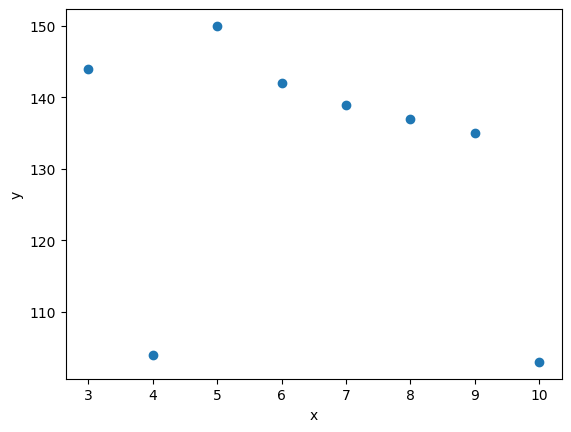

,size,price
0,5,150
1,9,135
2,10,103
3,3,144
4,6,142
5,8,137
6,4,104
7,7,139


In [20]:
df = random_graph_gen(8, 8)
df

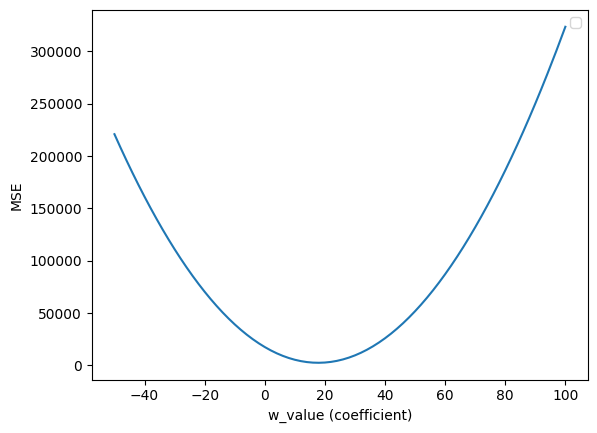

In [21]:
two_equation_gen(df)

In [22]:
weight = learned_weight(df)
weight

Epoch 0/100, Cost: 8821.25
Epoch 20/100, Cost: 1296.300000048181
Epoch 40/100, Cost: 1296.3
Epoch 60/100, Cost: 1296.3
Epoch 80/100, Cost: 1296.3
Learned Weight:


17.799999999999997

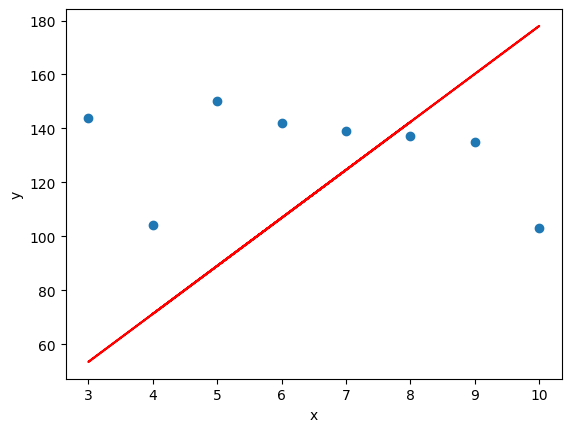

In [23]:
draw_line(weight)

# 두번째

## 2차원 배열, 편향까지 포함하기 때문, y = Wx + b

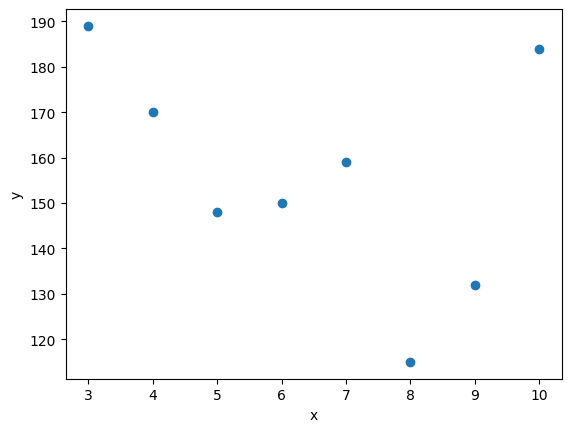

,size,price
0,8,115
1,10,184
2,6,150
3,9,132
4,5,148
5,7,159
6,4,170
7,3,189


In [24]:
df = random_graph_gen()
df

In [30]:
x = np.array(df['size']).reshape(-1, 1)
y = np.array(df['price']).reshape(-1, 1)

num_epoch=10000
learning_rate = 0.01

mse_list = []

# 0으로 w, b를 초기화 합니다.
w = np.zeros((1, 1))
b = np.zeros((1, 1))

for epoch in range(num_epoch):
    y_hat = np.dot(x, w) + b

    mse = ((y_hat - y)**2).mean()
    if mse < 0.0001:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    mse_list.append(mse)

    if epoch % 1000 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} mse = {3:.5f}".format(epoch, w[0, 0], b[0, 0], mse))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} mse = {3:.5f}".format(epoch, w[0, 0], b[0, 0], mse))

 0 w = 9.93500, b = 1.55875 mse = 24851.37500
1000 w = 4.45990, b = 120.39160 mse = 877.42761
2000 w = -0.97722, b = 160.03365 mse = 525.80354
3000 w = -2.81353, b = 173.42220 mse = 485.69527
4000 w = -3.43372, b = 177.94401 mse = 481.12029
5000 w = -3.64318, b = 179.47118 mse = 480.59844
6000 w = -3.71392, b = 179.98696 mse = 480.53891
7000 w = -3.73782, b = 180.16116 mse = 480.53212
8000 w = -3.74588, b = 180.22000 mse = 480.53135
9000 w = -3.74861, b = 180.23987 mse = 480.53126
------------------------------------------------------------
9999 w = -3.74953, b = 180.24657 mse = 480.53125


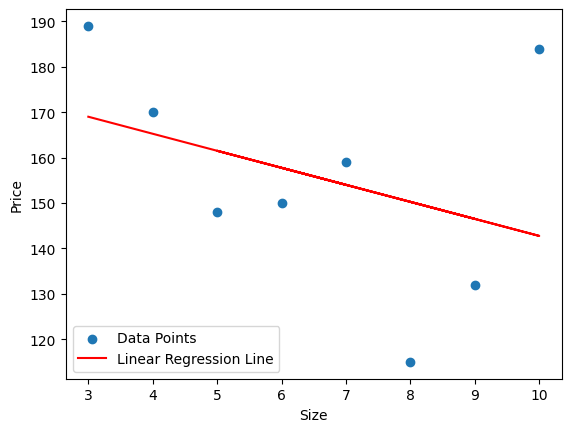

In [26]:
# 주어진 가중치와 편향
w = w[0, 0]
b = b[0, 0]

# x 값 생성
x_values = np.array(df['size'])

# 예측값 계산
y_values = w * x_values + b

# 데이터 포인트와 선 그리기
plt.scatter(df['size'], df['price'], label='Data Points')
plt.plot(x_values, y_values, color='red', label='Linear Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()

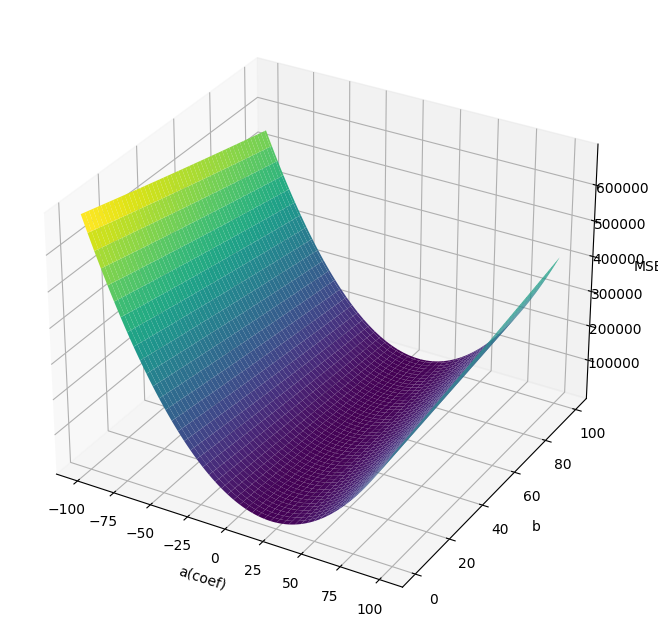

In [27]:
from mpl_toolkits.mplot3d import Axes3D

a_values = np.linspace(-100, 100, 100)
b_values = np.linspace(0, 100, 100)

# a와 b의 조합에 따른 MSE 계산
mse_values = np.zeros((len(a_values), len(b_values)))

for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        mse = np.mean((df['price'] - (a * df['size'] + b))**2)
        mse_values[i, j] = mse

# 3D 플롯 생성
A, B = np.meshgrid(a_values, b_values)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, mse_values.T, cmap='viridis')

ax.set_xlabel('a(coef)')
ax.set_ylabel('b')
ax.set_zlabel('MSE')

plt.show()

# 모듈사용

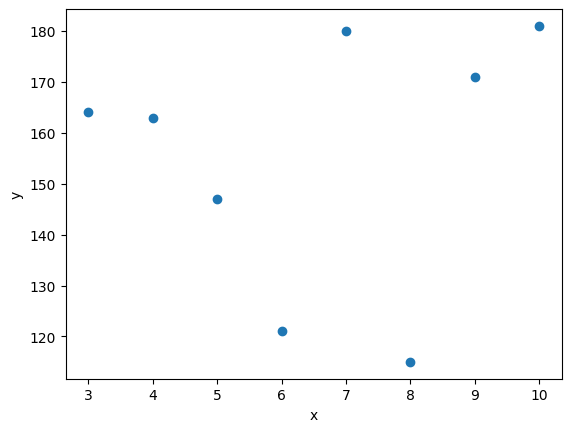

,size,price
0,8,115
1,3,164
2,10,181
3,7,180
4,6,121
5,9,171
6,5,147
7,4,163


In [4]:
# 새로운 랜덤 df 생성
df = random_graph_gen()
df

In [5]:
from sklearn.linear_model import LinearRegression

X = df[['size']]
y = df['price']

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X, y)

# 학습된 모델의 계수 및 절편 출력
coeff = model.coef_[0]
intercept = model.intercept_
print("Coefficient (기울기):", coeff)
print("Intercept (절편):", intercept)

Coefficient (기울기): 1.4523809523809526
Intercept (절편): 145.8095238095238


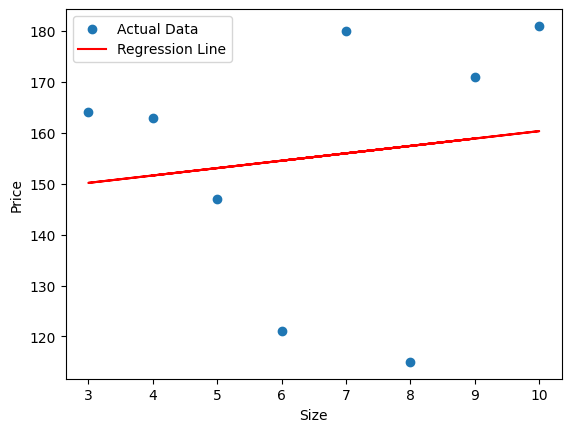

In [6]:
# 시각화
plt.scatter(X, y, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()